In [69]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import json
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from data_visualisation.plot import Plot

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [73]:
# hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
training_size = 20000

dataset_basepath = "../../../../datasets/"

<IPython.core.display.Javascript object>

In [74]:
with open("{0}sarcasm.json".format(dataset_basepath), "r") as f:
    datastore = json.load(f)

<IPython.core.display.Javascript object>

In [75]:
sentences = []
labels = []
for data in datastore:
    sentences.append(data["headline"])
    labels.append(data["is_sarcastic"])
training_data = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_data = sentences[training_size:]
testing_labels = labels[training_size:]

<IPython.core.display.Javascript object>

In [76]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_data)

training_sequences = tokenizer.texts_to_sequences(training_data)
training_padded = pad_sequences(
    training_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=truncating_type,
)

testing_sequences = tokenizer.texts_to_sequences(testing_data)
testing_padded = pad_sequences(
    testing_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=truncating_type,
)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
testing_padded.shape

(6709, 100)

<IPython.core.display.Javascript object>

In [77]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [78]:
num_epochs = 30
history = model.fit(
    training_padded,
    training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2,
)

Epoch 1/30
625/625 - 2s - loss: 0.6740 - accuracy: 0.5761 - val_loss: 0.6167 - val_accuracy: 0.6438
Epoch 2/30
625/625 - 2s - loss: 0.4646 - accuracy: 0.8158 - val_loss: 0.3984 - val_accuracy: 0.8365
Epoch 3/30
625/625 - 2s - loss: 0.3287 - accuracy: 0.8702 - val_loss: 0.3585 - val_accuracy: 0.8515
Epoch 4/30
625/625 - 2s - loss: 0.2745 - accuracy: 0.8928 - val_loss: 0.3596 - val_accuracy: 0.8384
Epoch 5/30
625/625 - 2s - loss: 0.2389 - accuracy: 0.9062 - val_loss: 0.3412 - val_accuracy: 0.8562
Epoch 6/30
625/625 - 2s - loss: 0.2106 - accuracy: 0.9190 - val_loss: 0.3476 - val_accuracy: 0.8517
Epoch 7/30
625/625 - 2s - loss: 0.1879 - accuracy: 0.9304 - val_loss: 0.3553 - val_accuracy: 0.8512
Epoch 8/30
625/625 - 2s - loss: 0.1692 - accuracy: 0.9362 - val_loss: 0.3632 - val_accuracy: 0.8533
Epoch 9/30
625/625 - 2s - loss: 0.1523 - accuracy: 0.9437 - val_loss: 0.3789 - val_accuracy: 0.8535
Epoch 10/30
625/625 - 2s - loss: 0.1387 - accuracy: 0.9509 - val_loss: 0.4205 - val_accuracy: 0.8389

<IPython.core.display.Javascript object>

In [79]:
def plot_graphs(df, x_key, y_key, val_y, **kwargs):
    p = Plot(df)
    plots = [
        {
            "type": "line",
            "params": (
                x_key,
                y_key,
                {
                    "axes_settings": {"title": kwargs.get("title")},
                    "label": kwargs.get("label"),
                    "legend": "brief",
                },
            ),
        },
        {
            "type": "line",
            "params": (
                x_key,
                val_y,
                {
                    "axes_settings": {"title": kwargs.get("val_title")},
                    "label": kwargs.get("val_label"),
                    "legend": "brief",
                },
            ),
        },
    ]
    p.plot_bulk(plots, single_axes=True)

<IPython.core.display.Javascript object>

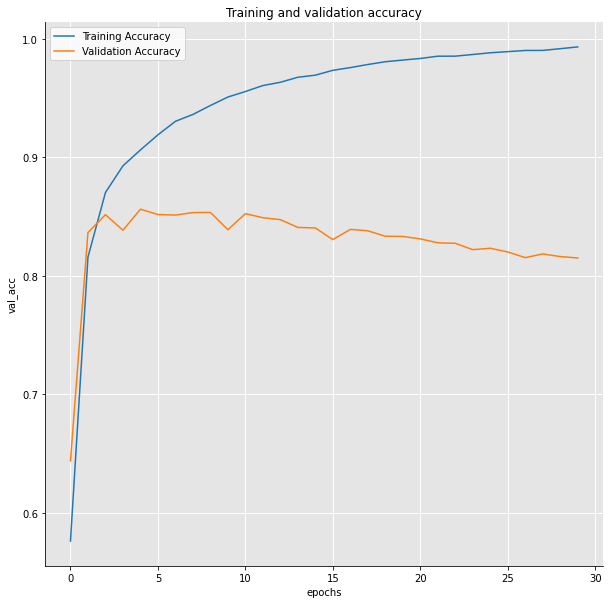

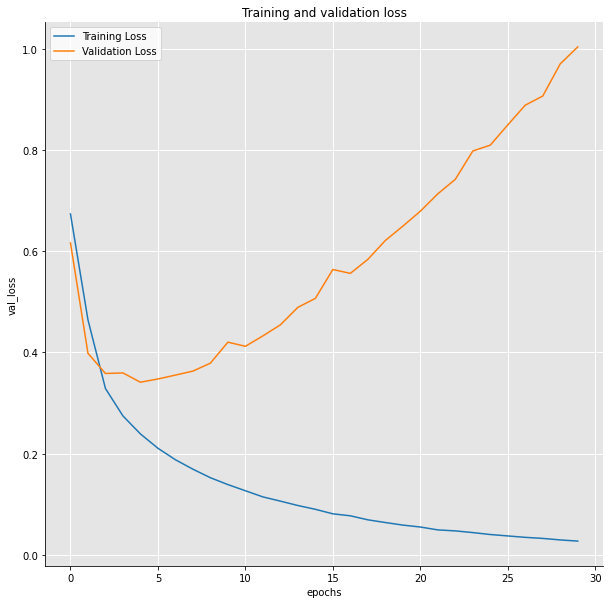

<IPython.core.display.Javascript object>

In [80]:
history_data = history.history
acc = history_data["accuracy"]
loss = history_data["loss"]

val_acc = history_data["val_accuracy"]
val_loss = history_data["val_loss"]

df_acc = pd.DataFrame({"epochs": range(len(acc)), "acc": acc, "val_acc": val_acc})
df_loss = pd.DataFrame({"epochs": range(len(loss)), "loss": loss, "val_loss": val_loss})
plot_graphs(
    df_acc,
    "epochs",
    "acc",
    "val_acc",
    title="Training and validation accuracy",
    label="Training Accuracy",
    val_label="Validation Accuracy",
)

plot_graphs(
    df_loss,
    "epochs",
    "loss",
    "val_loss",
    title="Training and validation loss",
    label="Training Loss",
    val_label="Validation Loss",
)